100%|██████████| 7680/7680 [02:37<00:00, 48.89it/s]
/home/peiheng/development/ox-dissertation/models/transformer.py:930: RuntimeWarning: invalid value encountered in divide
  attentions[i][layer][j][k] /= counts[i][k]


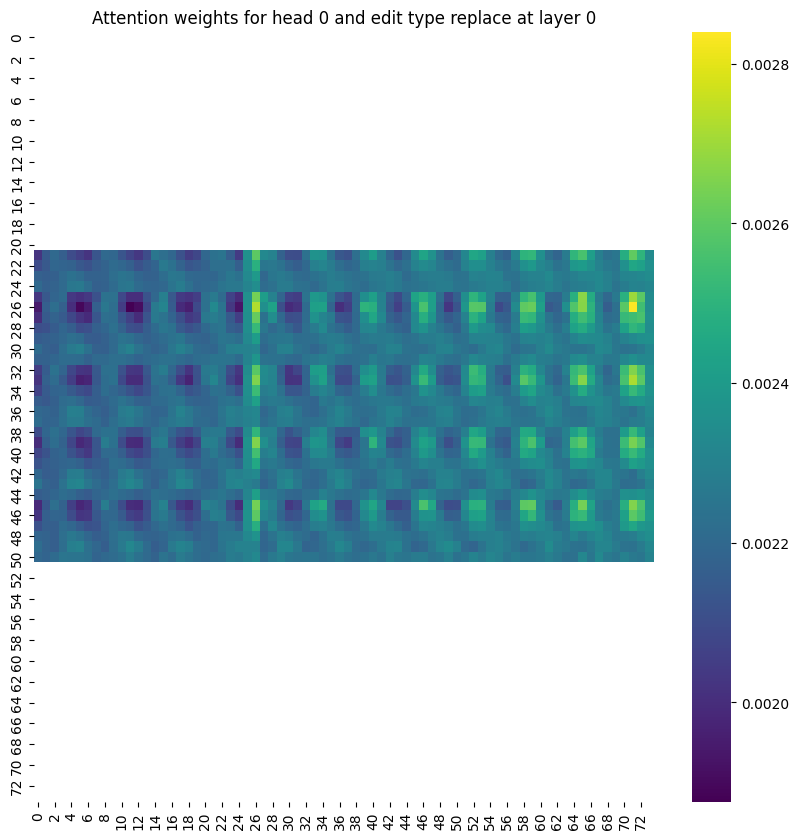

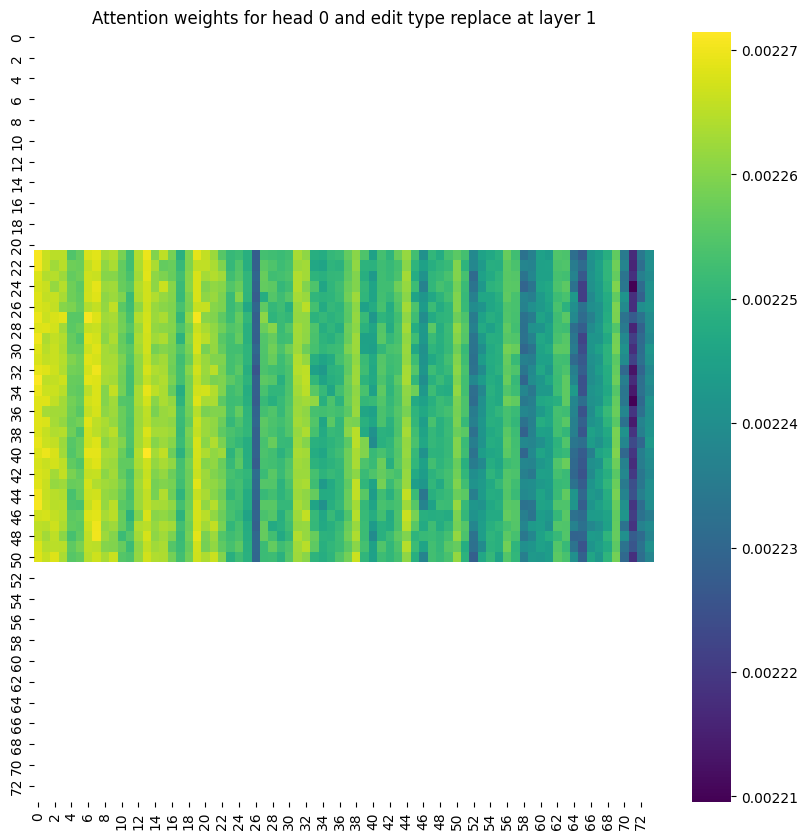

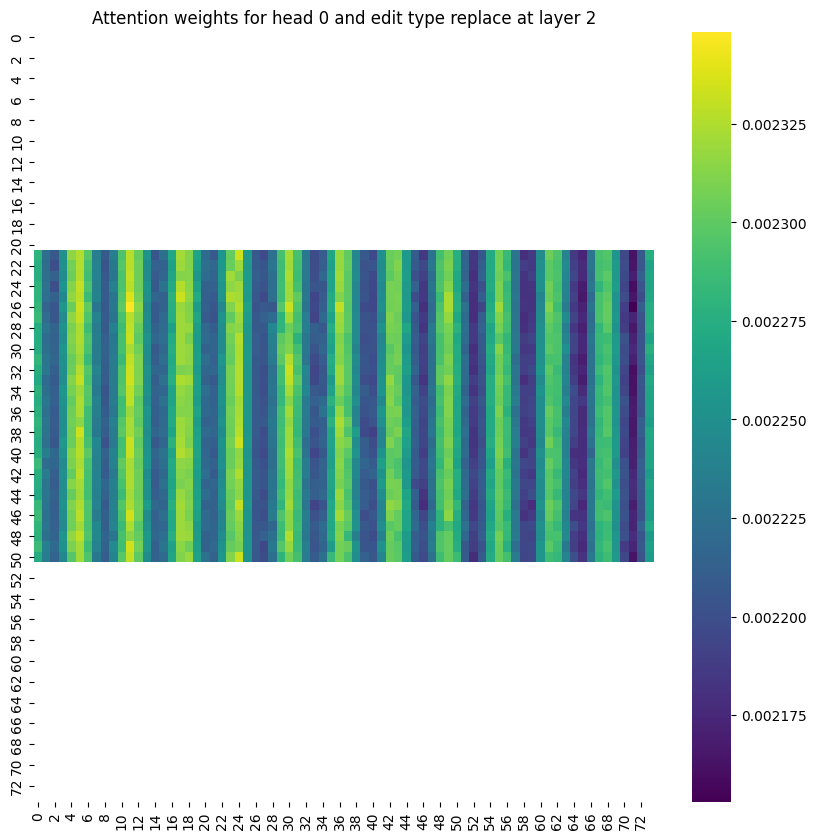

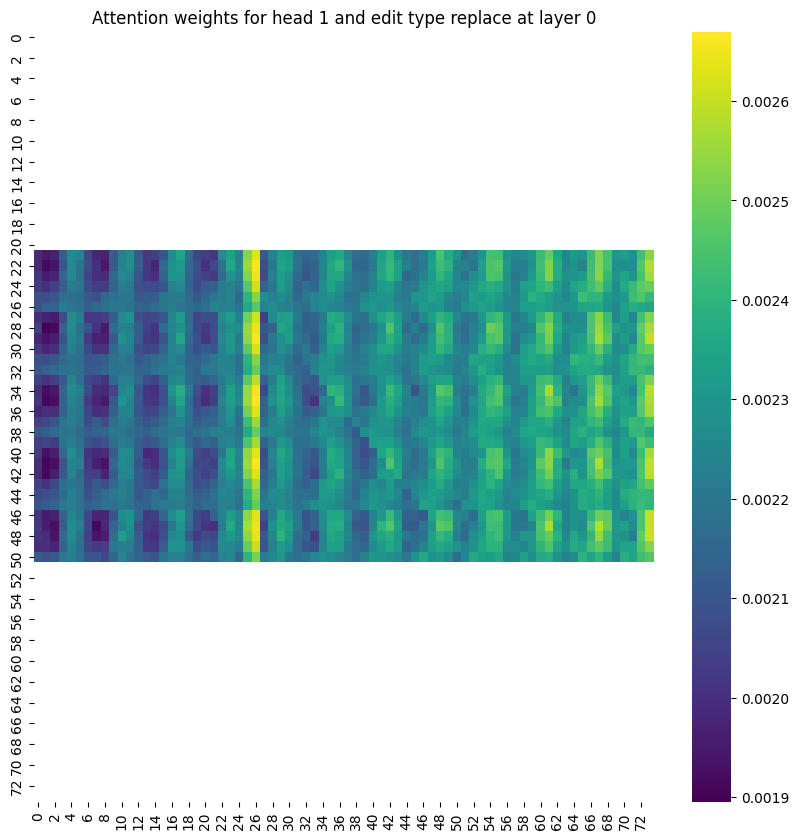

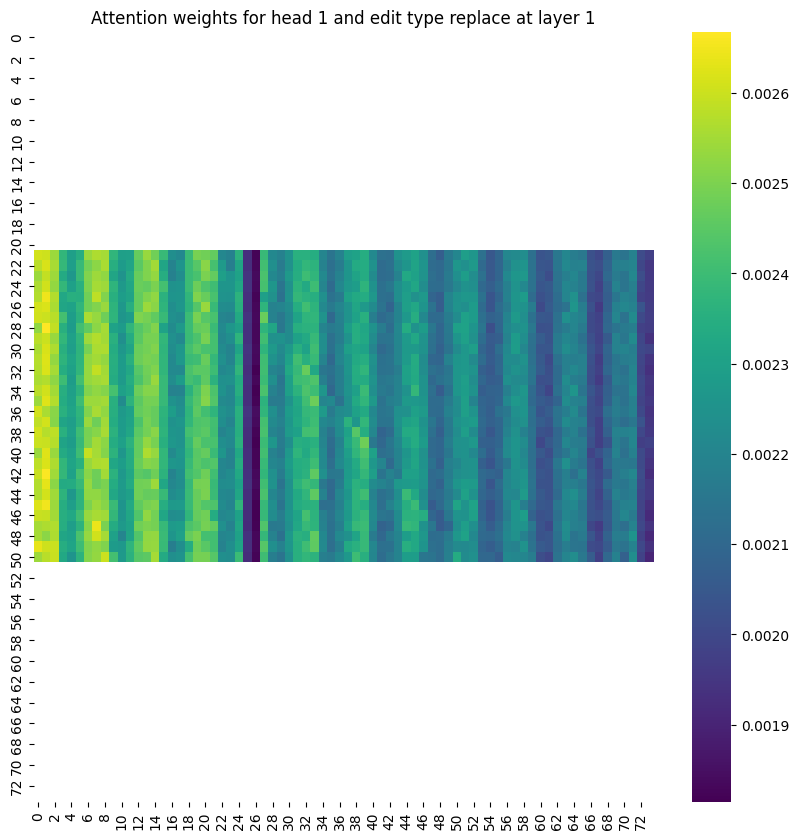

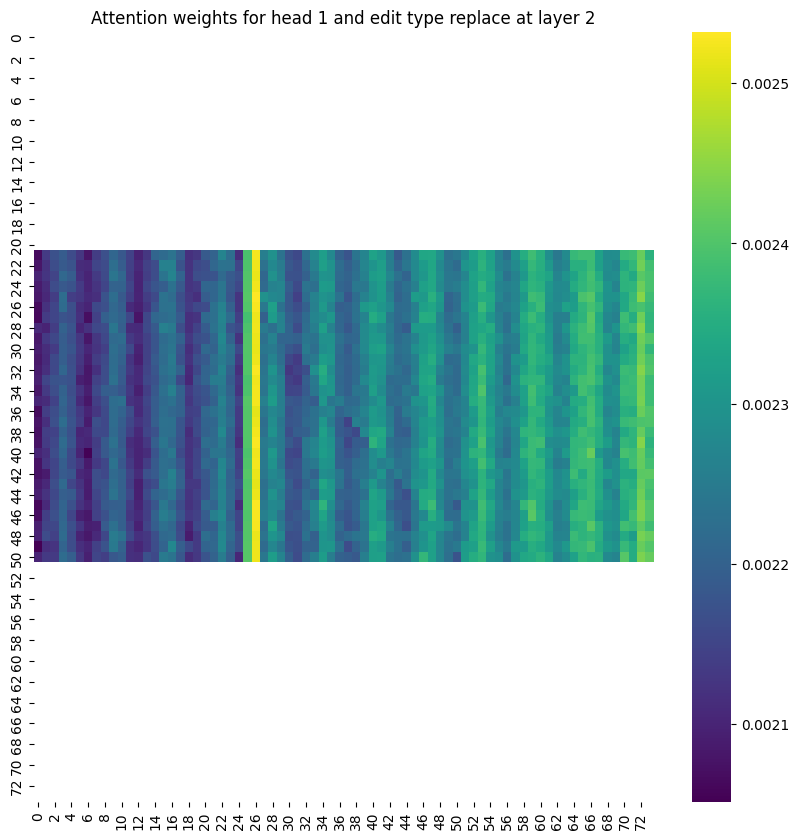

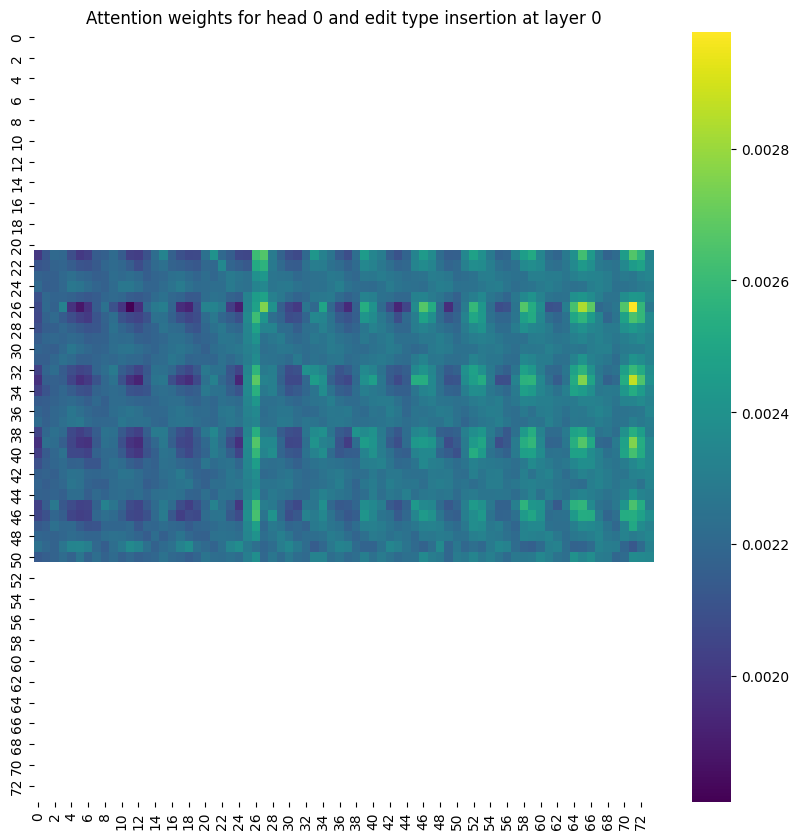

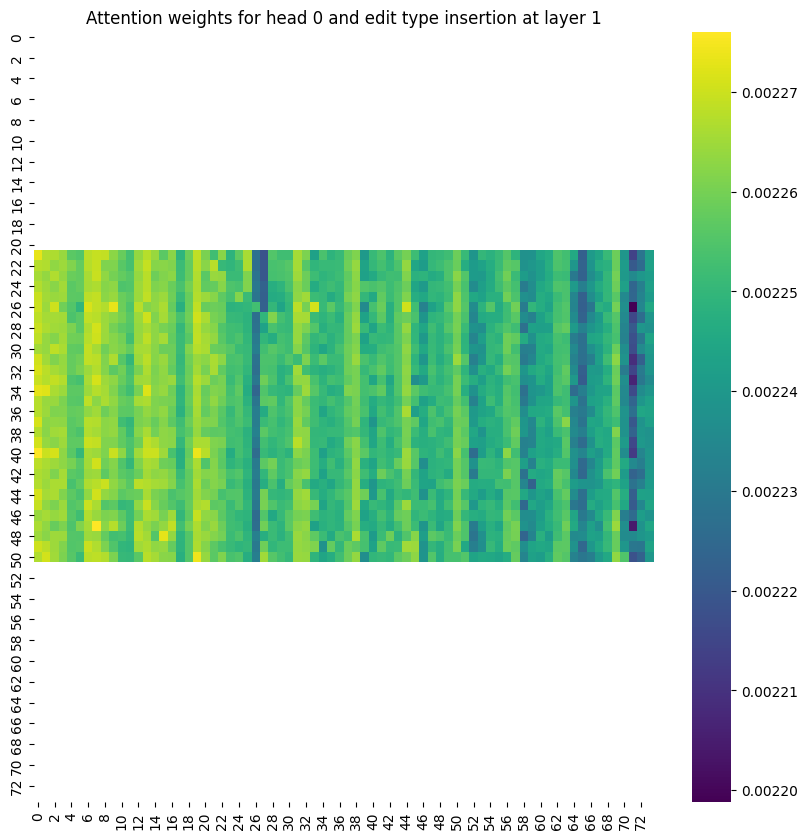

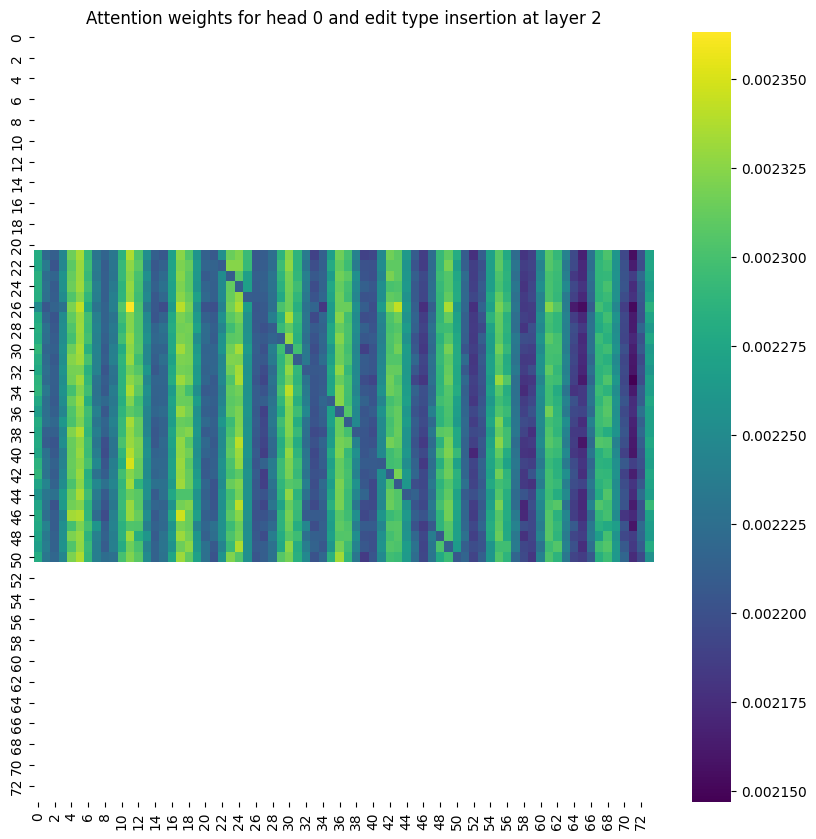

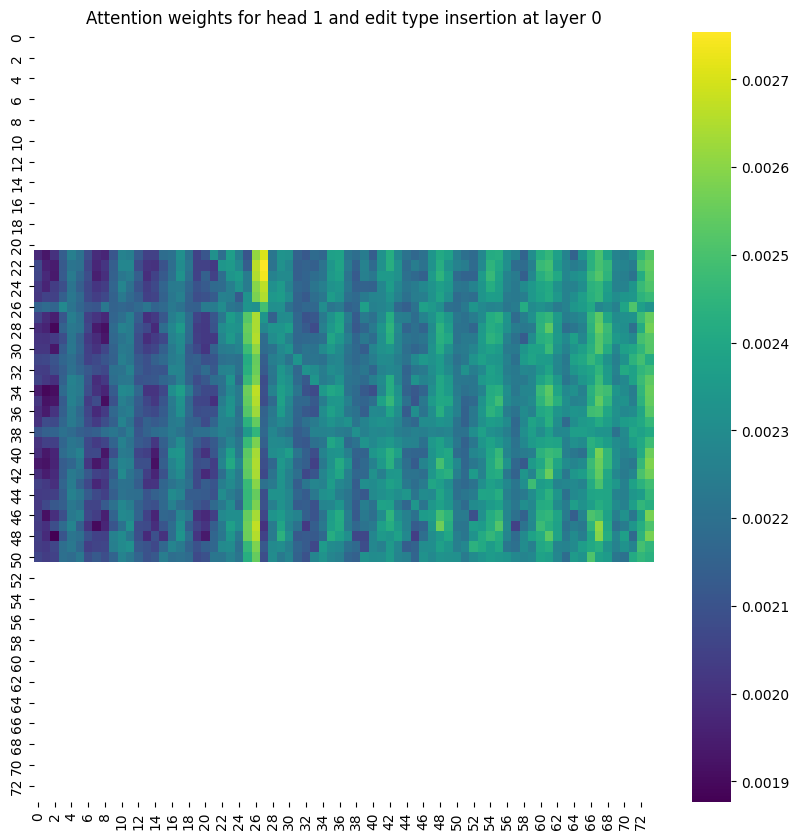

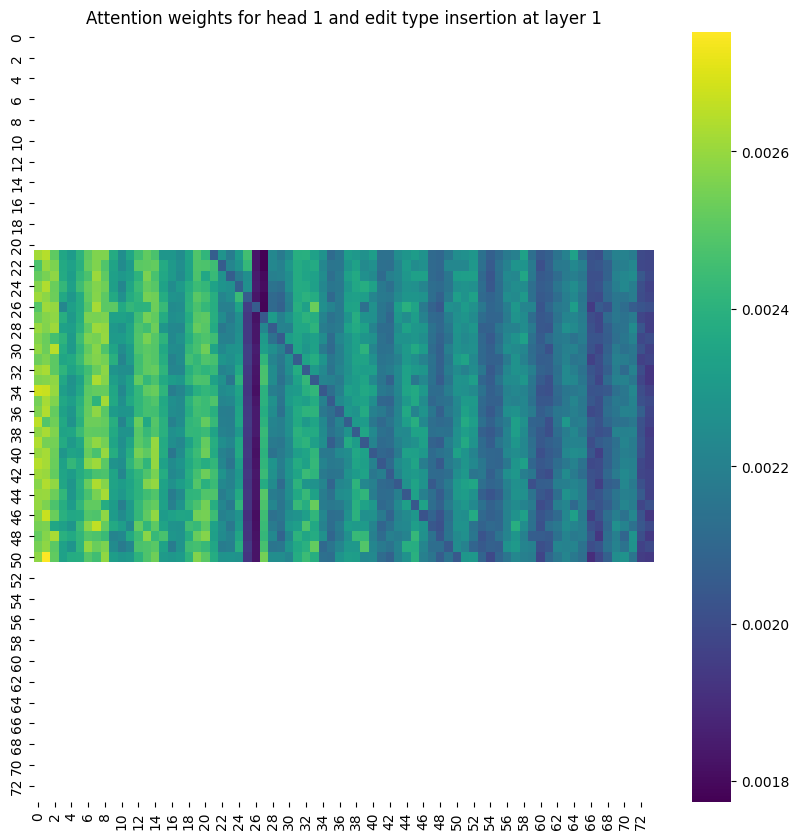

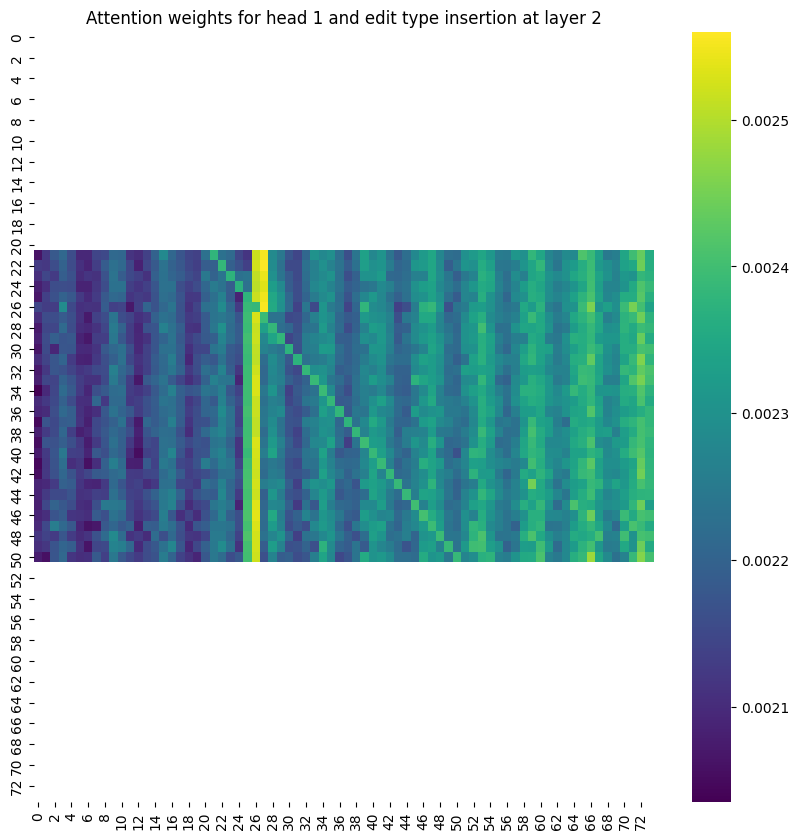

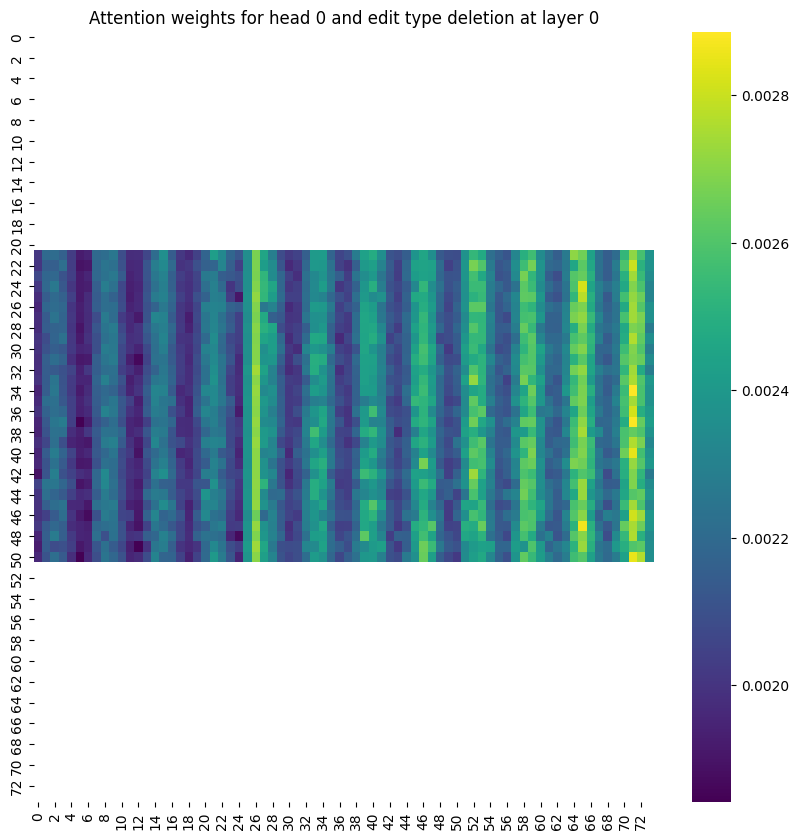

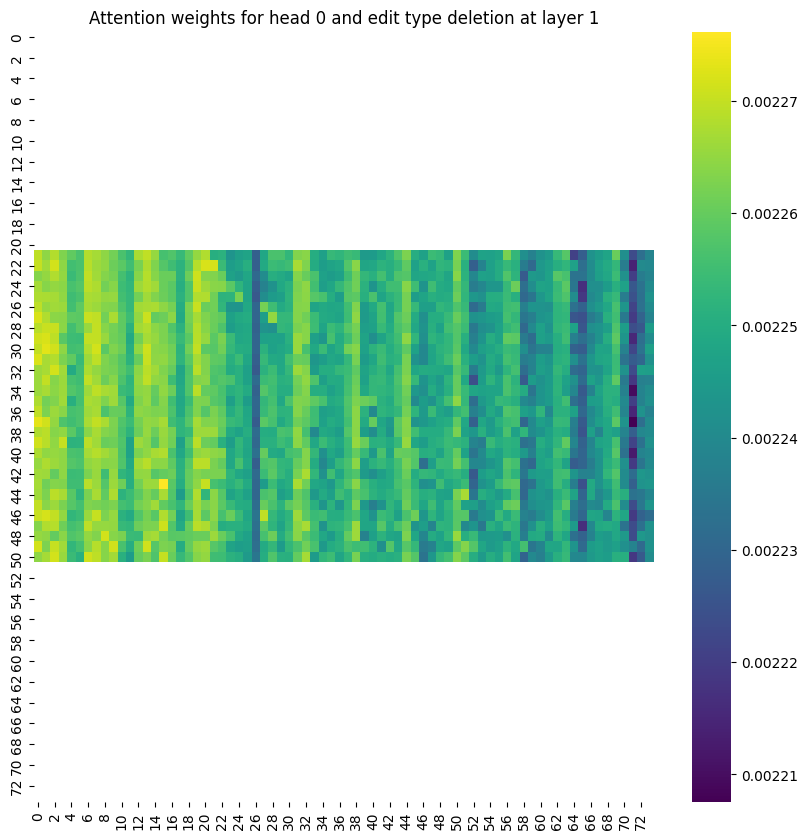

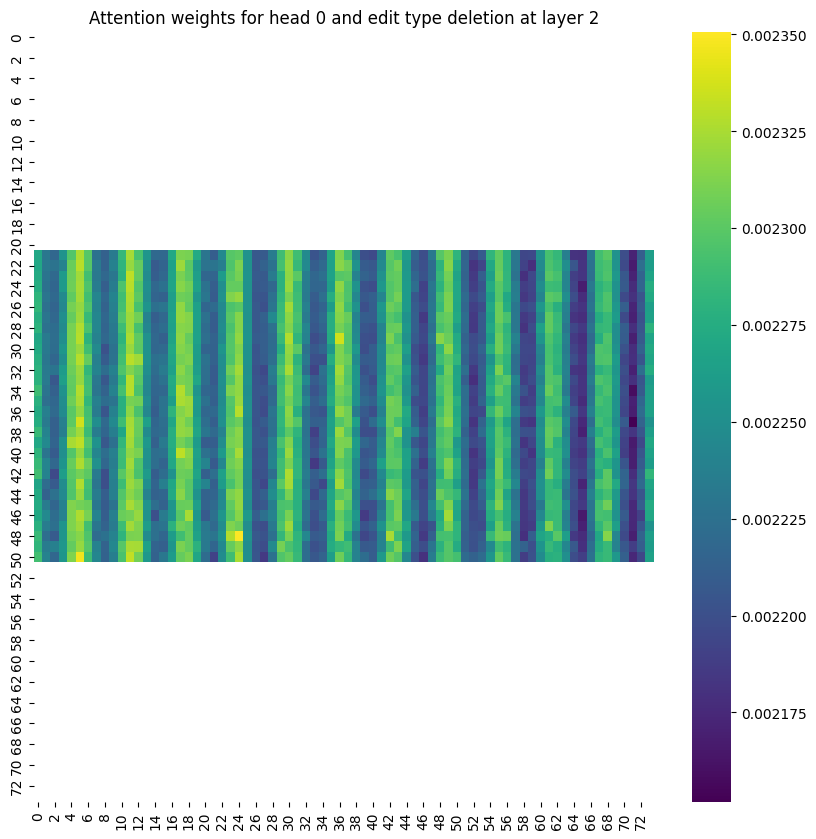

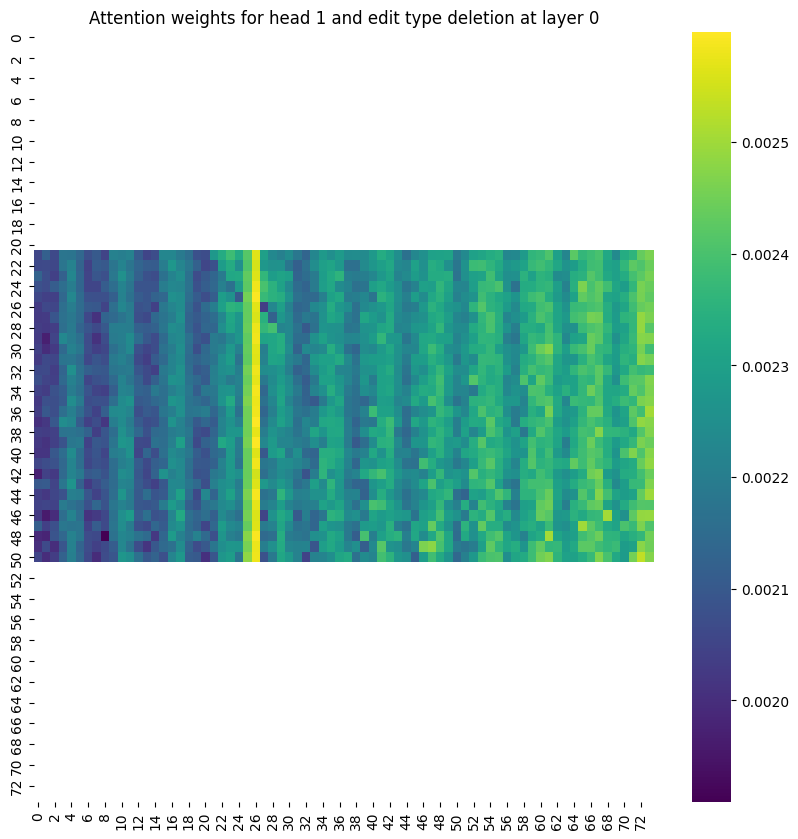

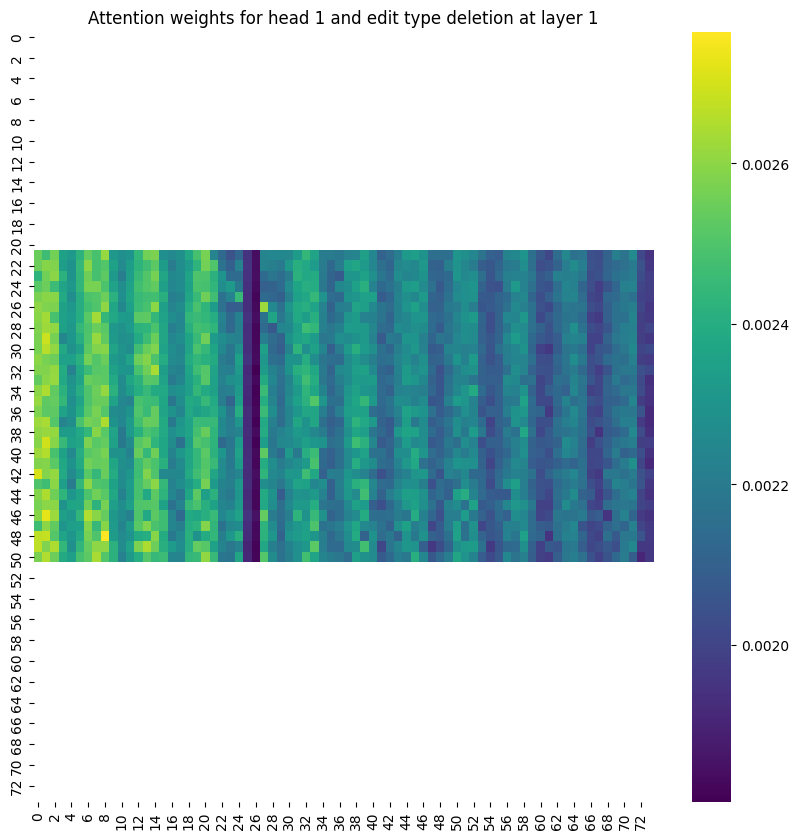

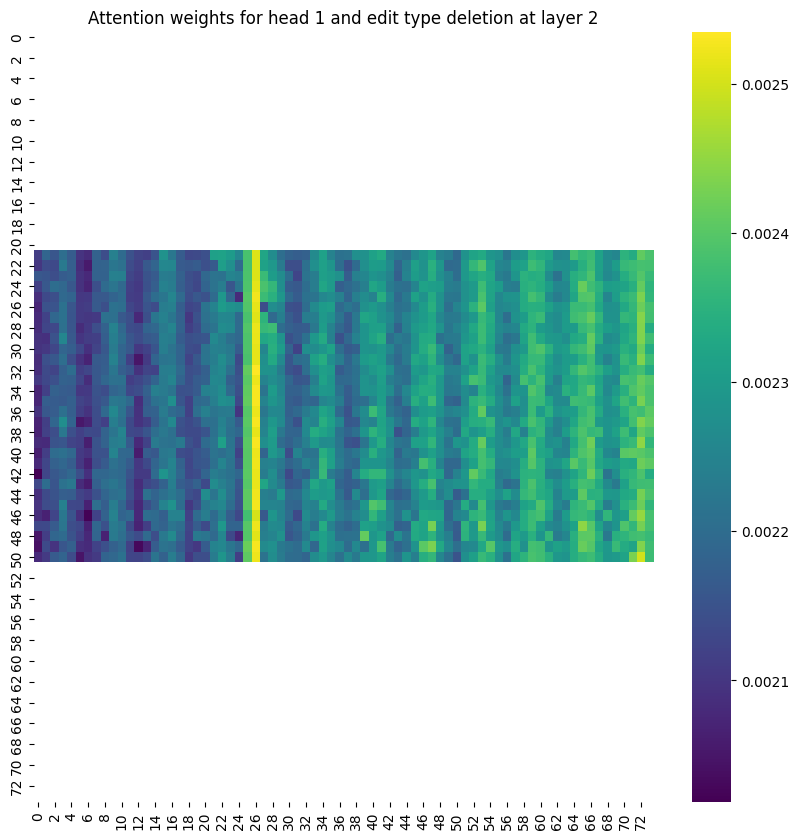

In [2]:
from models.transformer import visualize_attention

model_name = 'dp-hek293t-pe2'
attentions = visualize_attention(percentage=1, model_name=model_name, num_encoder_units=3)

# save the attention matrix
import numpy as np
np.save(f'attentions_{model_name}.npy', attentions)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_name = 'dp-hek293t-pe2'

attentions = np.load(f'attentions_{model_name}.npy', allow_pickle=True)

num_heads = 2
# plot the attention weights for each head and edit type
for i in range(3):
    for j in range(num_heads):
        plt.figure(figsize=(10, 10))
        # annotate the diagonal with the values
        annot = np.zeros_like(attentions[i][j])
        np.fill_diagonal(annot, attentions[i][j].diagonal())
        attn = attentions[i][j]
        # remove the regions 
        sns.heatmap(attentions[i][j], cmap='coolwarm', annot=annot, fmt=".2f", linewidths=.5, annot_kws={"size": 1})
        plt.title(f'Attention weights for head {j} and edit type {i}')
        plt.show()